In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, confusion_matrix)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('./credit_card_approval.csv')

In [2]:
data.head()

,Age,Credit Score,Annual Income,PriorDefault,Employed,Approval,Gender
0,33.541537,678.0,53.984881,0,1,No,Male
1,24.808335,624.0,41.131160,1,0,No,Male
2,23.342078,671.0,33.012298,1,1,No,Female
3,29.987970,671.0,66.942232,1,1,No,Female
4,29.707443,630.0,116.613468,1,1,No,Male


In [7]:
numeric_features = ['Age', 'Credit Score', 'Annual Income']

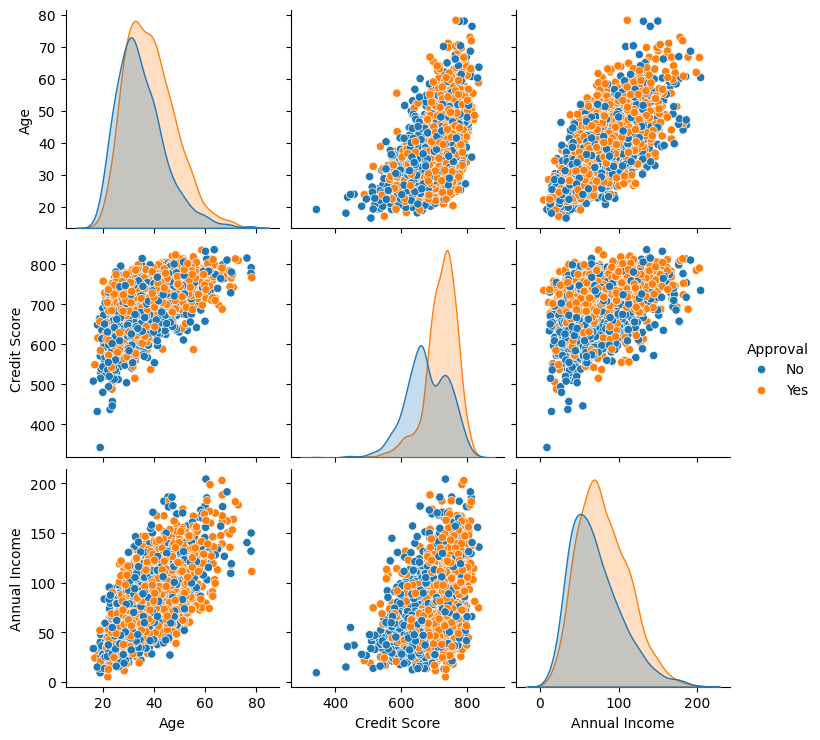

In [10]:
sns.pairplot(data, vars = numeric_features, hue = "Approval", diag_kind = 'kde')

Data modelling

In [15]:
data.head()
X = data.drop(columns='Approval')


In [17]:
y = data['Approval']
X.head()

,Age,Credit Score,Annual Income,PriorDefault,Employed,Gender
0,33.541537,678.0,53.984881,0,1,Male
1,24.808335,624.0,41.131160,1,0,Male
2,23.342078,671.0,33.012298,1,1,Female
3,29.987970,671.0,66.942232,1,1,Female
4,29.707443,630.0,116.613468,1,1,Male


In [19]:
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

In [22]:
X = X.astype(float)
X.head()

,Age,Credit Score,Annual Income,PriorDefault,Employed,Gender_Male,Gender_Others
0,33.541537,678.0,53.984881,0.0,1.0,1.0,0.0
1,24.808335,624.0,41.131160,1.0,0.0,1.0,0.0
2,23.342078,671.0,33.012298,1.0,1.0,0.0,0.0
3,29.987970,671.0,66.942232,1.0,1.0,0.0,0.0
4,29.707443,630.0,116.613468,1.0,1.0,1.0,0.0


In [23]:
y = y.map({'Yes':1, 'No':2})
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Approval, dtype: int64

In [24]:
y = data["Approval"]
y.head()

0    No
1    No
2    No
3    No
4    No
Name: Approval, dtype: object

In [25]:
y = y.map({'Yes':1, 'No':0})
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Approval, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
y_train.value_counts(normalize=True)*100

Approval
1    56.05
0    43.95
Name: proportion, dtype: float64

In [33]:
y_test.value_counts(normalize=True)*100

Approval
1    56.0
0    44.0
Name: proportion, dtype: float64

In [35]:
dtree1 = DecisionTreeClassifier(random_state=42)

dtree1.fit(X_train, y_train)
dtree1

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [58]:
def model_perf(model, predictors, target):

    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    model_perf_table = pd.DataFrame({'Accuracy':acc, 'Recall':recall, 'Precision':precision, 'F1-Score':f1}, index=[0])
    return model_perf_table

In [ ]:
def confusus_matrix(model, predictors, target):

    pred = model.predict(predictors)
    asim = confusion_matrix(target, pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(asim, annot=True, fmt=".2f")

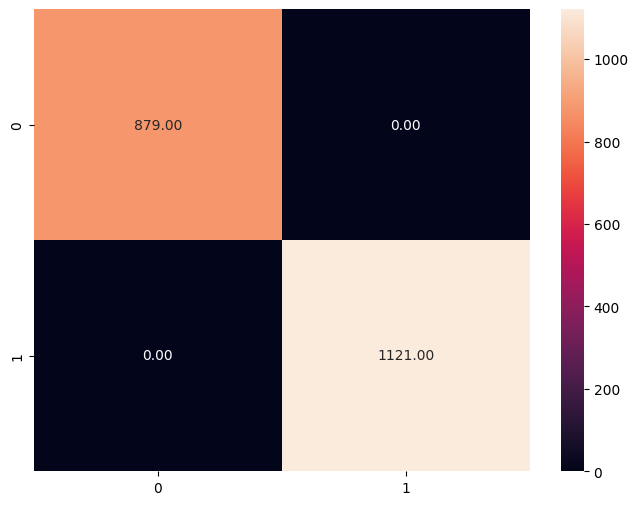

In [54]:
confusus_matrix(dtree1, X_train, y_train)

In [59]:
model_perf(dtree1, X_train, y_train)

,Accuracy,Recall,Precision,F1-Score
0,1.0,1.0,1.0,1.0


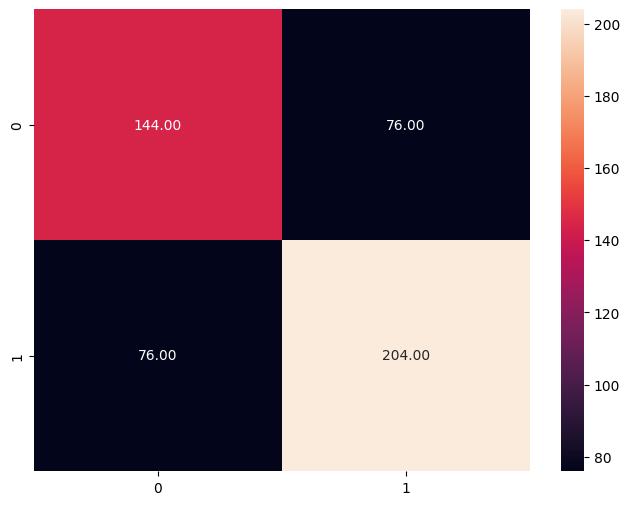

In [60]:
confusus_matrix(dtree1, X_test, y_test)

In [61]:
model_perf(dtree1, X_test, y_test)

,Accuracy,Recall,Precision,F1-Score
0,0.696,0.728571,0.728571,0.728571
